## **Importing Packages and libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

load_dotenv('.env')
pd.set_option("display.max_rows",10)
pd.set_option("display.max_column",10)
pd.set_option("display.width",100)
pd.set_option("display.max_colwidth",None)
CUDA_LAUNCH_BLOCKING=1

## **Importing data**

In [15]:
data_path = os.getenv('RAW_DATA_PATH')
data =  pd.read_csv(data_path,encoding="unicode_escape")

## **Exploring data**

In [16]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [17]:
data.shape

(1048575, 4)

In [18]:
# Calculate and display the number of the null values in each column in the dataframe
data.isnull().sum()

Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64

In [19]:
# Fill null values with the previous non null value for each column
data.ffill(axis=0,inplace=True)

In [20]:
# Display sample of the dataframe
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [21]:
# Filter out all the words that has tah "O"
visualizing_data = data[data["Tag"] != "O"]

# Count the frequency of each tag in the dataframe
order = visualizing_data["Tag"].value_counts().index

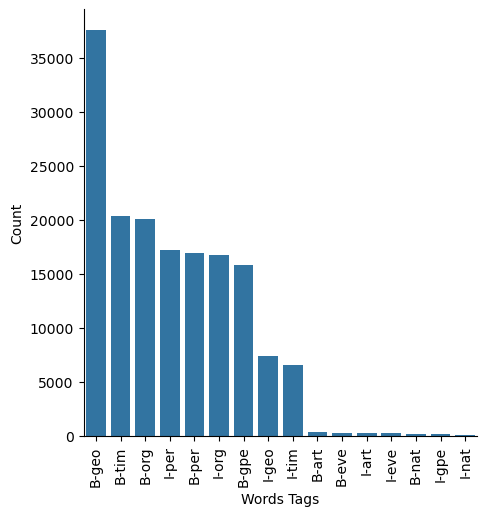

In [22]:
# Visualize tags frequency
ax = sns.catplot(kind="count",x="Tag",data=visualizing_data,order=order)
ax.set_xlabels("Words Tags")
ax.set_ylabels("Count")
ax.set_titles("Tags count")

# Rotate x labels with 90 degrees
plt.xticks(rotation =90)
plt.show()

In [23]:
# Calculate how many distinct words are existed in data
words = set(data["Word"])

print("Count of distinct words in data = ",len(words))

Count of distinct words in data =  35177


In [24]:
# Calculate the frequency of words in each sentence
sentences_length = data.groupby('Sentence #').size()

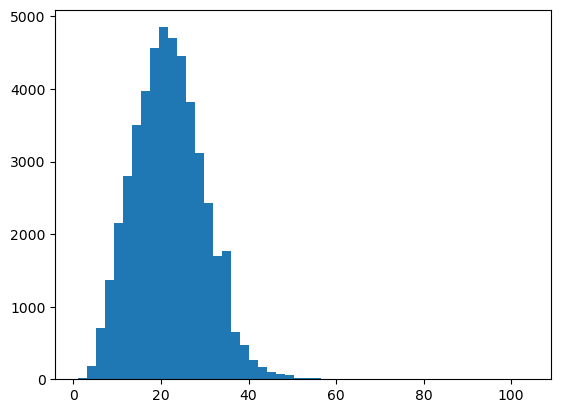

In [25]:
# Visualize the frequency of words in each sentence
plt.hist(sentences_length,bins=50) ;

In [26]:
print("On average, each sentence has words count of ", np.average(sentences_length))

On average, each sentence has words count of  21.863987989741236
